## Polytope Climate-DT Country cut-out example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [1]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [2]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-geo
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [1]:
import earthkit.data
import earthkit.plots
import earthkit.geo.cartography
from polytope.api import Client

In [2]:
# Set True if you want to make a live request for the data, or false if you want to use the cached grib file
LIVE_REQUEST = True

In [ ]:
countries = ["Germany"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": -1,
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "1200",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

In [ ]:
data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

2025-09-09 09:09:38 - INFO - Key read from /home/maaw/.polytopeapirc
2025-09-09 09:09:38 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20251109'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 47.670703124999996\n'
            '      - 9.182812500000011\n'
            '    - - 47.670703124999996\n'
            '      - 9.127539062500006\n'
            '    - - 47.656396484374994\n'
            '      - 8.881152343750017\n'
            '    - - 47.6626953125\n'
            '      - 8.8740234375\n'
            '    - - 47.70361328125\n'
            '      - 8.831152343750006\n'
            '    - - 47.716552734375\n'
            '      - 8.793066406250006\n'
            '    - - 47.709912109375\n'
            '      - 8.770117187500006\n'
            '    - - 47.698046874999996\n'
            ' 

2025-09-09 09:09:40 - INFO - Request accepted. Please poll ./9255918c-bb1f-4b7b-a9d8-c4baeb67b424 for status
2025-09-09 09:09:40 - INFO - Polytope user key found in session cache for user maaw
2025-09-09 09:09:40 - INFO - Checking request status (./9255918c-bb1f-4b7b-a9d8-c4baeb67b424)...
2025-09-09 09:09:40 - INFO - The current status of the request is 'queued'
2025-09-09 09:09:42 - INFO - The current status of the request is 'processing'
2025-09-09 09:10:01 - INFO - The current status of the request is 'processed'


9255918c-bb1f-4b7b-a9d8-c4baeb67b424.covjson:   0%|          | 0.00/674k [00:00<?, ?B/s]

In [ ]:
ds = data.to_xarray()
ds

<xarray.Dataset> Size: 24kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 498)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-11-09 12:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 4kB 0 1 2 3 4 5 6 ... 491 492 493 494 495 496 497
    latitude   (points) float64 4kB 45.44 45.49 45.49 ... 46.82 46.82 46.82
    longitude  (points) float64 4kB 13.86 13.69 13.78 ... 16.04 16.14 16.24
    levelist   (points) float64 4kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    10u        (datetimes, number, steps, points) float64 4kB 0.5618 ... 0.3038
    2t         (datetimes, number, steps, points) float64 4kB 288.8 ... 284.5
Attributes: (12/15)
    activity:     scenariomip
    class:        d1
    dataset:      climate-dt
    experiment:   ssp3-7.0
    expver:       0001
    generation:   1
    ...           ...
    resolution:   high
    stream:       clte
    type:         fc
    number:       0
    step:         0
    date:         2025-11-09 12:00:00Z

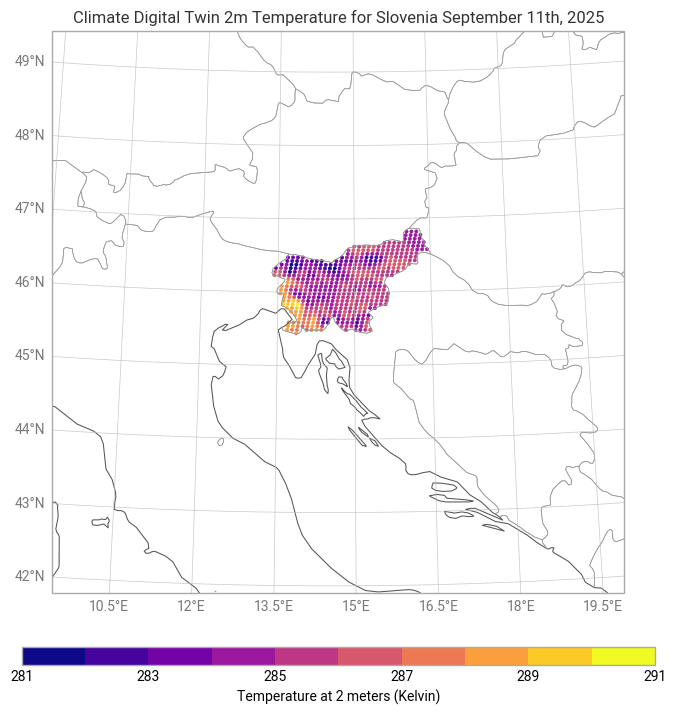

In [ ]:
chart = earthkit.plots.Map(domain=["Germany"])
chart.point_cloud(
    ds['2t'],
    x="longitude",
    y="latitude",
    auto_style=True
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 2m Temperature for Germany")

chart.legend()

chart.show()

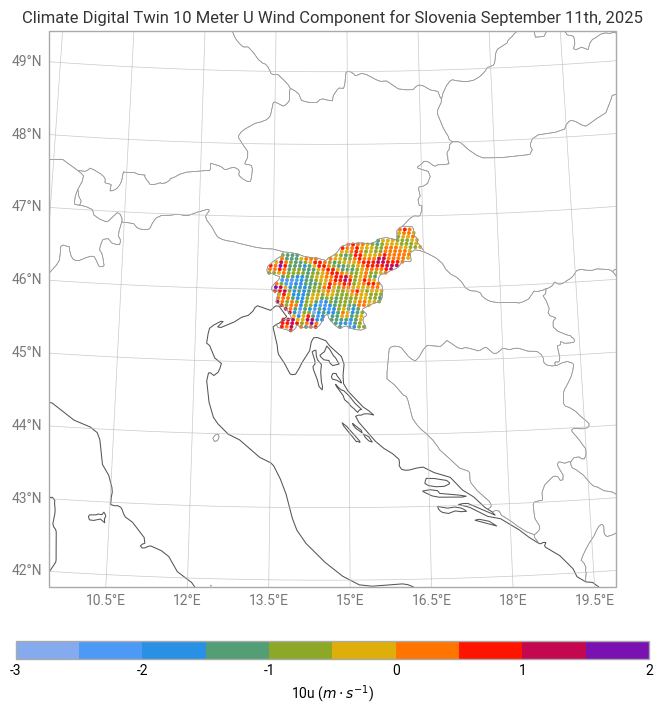

In [18]:
style =earthkit.plots.styles.Style(
    #levels=np.arange(270, 310, 1),
    colors=["#85AAEE", "#208EFC", "#6CA632", "#FFB000", "#FF0000", "#7A11B1"],
)
chart = earthkit.plots.Map(domain=["Slovenia", "Croatia", "Austria"])
chart.point_cloud(
    ds['10u'],
    x="longitude",
    y="latitude",
    style=style
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 10 Meter U Wind Component for Slovenia September 11th, 2025")

chart.legend()

chart.show()

In [40]:
countries = ["Germany"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20250902",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

ds = data.to_xarray()
ds = ds.rename({"2t": "Temperature"})
ds["Temperature"].attrs["units"] = "Kelvin"
ds["Temperature"].attrs["long_name"] = "Temperature at 2 meters"

DEBUG:polytope.api.Client.RL4YEW:Gathered Polytope client configuration:
{'address': 'polytope.lumi.apps.dte.destination-earth.eu',
 'insecure': False,
 'key_path': PosixPath('/home/maaw/.polytopeapirc'),
 'log_file': None,
 'log_level': 'DEBUG',
 'password': None,
 'port': None,
 'quiet': False,
 'skip_tls': False,
 'user_email': None,
 'user_key': None,
 'username': 'maaw',
 'verbose': False}
DEBUG:polytope.api.Client.RL4YEW:Creating Polytope client...
2025-09-02 20:02:13 - INFO - Key read from /home/maaw/.polytopeapirc
INFO:polytope.api.Client.RL4YEW:Key read from /home/maaw/.polytopeapirc
2025-09-02 20:02:13 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20250902'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 47.670703124999996\n'
            '      - 9.182812500000011\n'
            '   

DEBUG:polytope.api.Client.RL4YEW:Polytope client attempting HTTP POST https://polytope.lumi.apps.dte.destination-earth.eu:443/api/v1/requests/destination-earth
{'headers': {'Authorization': 'EmailKey adam.warde@ecmwf.int:8e3eca7014e962f75daa7248befbaf62'}, 'json': {'verb': 'retrieve', 'request': "activity: scenariomip\nclass: d1\ndataset: climate-dt\ndate: '20250902'\nexperiment: ssp3-7.0\nexpver: '0001'\nfeature:\n  shape:\n  - - - 47.670703124999996\n      - 9.182812500000011\n    - - 47.670703124999996\n      - 9.127539062500006\n    - - 47.656396484374994\n      - 8.881152343750017\n    - - 47.6626953125\n      - 8.8740234375\n    - - 47.70361328125\n      - 8.831152343750006\n    - - 47.716552734375\n      - 8.793066406250006\n    - - 47.709912109375\n      - 8.770117187500006\n    - - 47.698046874999996\n      - 8.754785156250023\n    - - 47.700048828125\n      - 8.728320312500017\n    - - 47.76611328125\n      - 8.617871093750011\n    - - 47.775634765625\n      - 8.5726562500000

449de776-5362-4738-8726-153d3de3b6fc.covjson:   0%|          | 0.00/667k [00:00<?, ?B/s]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): download-polytope.lumi.apps.dte.destination-earth.eu:443
DEBUG:urllib3.connectionpool:https://download-polytope.lumi.apps.dte.destination-earth.eu:443 "GET /default/449de776-5362-4738-8726-153d3de3b6fc.covjson HTTP/11" 200 683011


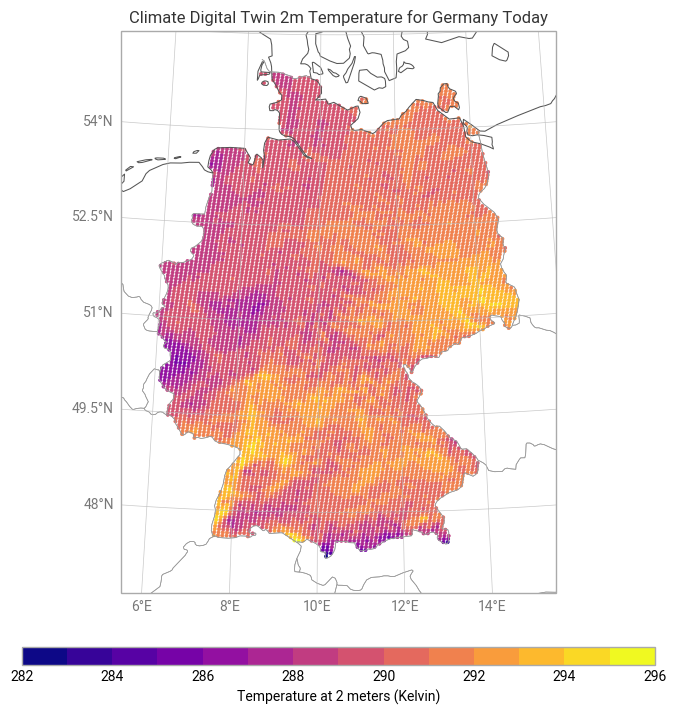

In [41]:
chart = earthkit.plots.Map(domain="Germany")
chart.point_cloud(
    ds['Temperature'],
    x="longitude",
    y="latitude",
    auto_style=True
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 2m Temperature for Germany Today")

chart.legend()

chart.show()

In [42]:
countries = ["Poland"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20250902",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

ds = data.to_xarray()
ds = ds.rename({"2t": "Temperature"})
ds["Temperature"].attrs["units"] = "Kelvin"
ds["Temperature"].attrs["long_name"] = "Temperature at 2 meters"

DEBUG:polytope.api.Client.MHCEBG:Gathered Polytope client configuration:
{'address': 'polytope.lumi.apps.dte.destination-earth.eu',
 'insecure': False,
 'key_path': PosixPath('/home/maaw/.polytopeapirc'),
 'log_file': None,
 'log_level': 'DEBUG',
 'password': None,
 'port': None,
 'quiet': False,
 'skip_tls': False,
 'user_email': None,
 'user_key': None,
 'username': 'maaw',
 'verbose': False}
DEBUG:polytope.api.Client.MHCEBG:Creating Polytope client...
2025-09-02 20:02:37 - INFO - Key read from /home/maaw/.polytopeapirc
INFO:polytope.api.Client.MHCEBG:Key read from /home/maaw/.polytopeapirc
2025-09-02 20:02:37 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20250902'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 51.517919921875\n'
            '      - 23.605273437500017\n'
            '    -

DEBUG:urllib3.connectionpool:https://polytope.lumi.apps.dte.destination-earth.eu:443 "POST /api/v1/requests/destination-earth HTTP/11" 202 49
DEBUG:polytope.api.Client.MHCEBG:Polytope client received HTTP SUCCESS (202)
2025-09-02 20:02:38 - INFO - Request accepted. Please poll ./2c17219b-6204-4b5d-a788-e787f200c951 for status
INFO:polytope.api.Client.MHCEBG:Request accepted. Please poll ./2c17219b-6204-4b5d-a788-e787f200c951 for status
DEBUG:polytope.api.Client.MHCEBG:Server message: Request queued
2025-09-02 20:02:38 - INFO - Polytope user key found in session cache for user maaw
INFO:polytope.api.Client.MHCEBG:Polytope user key found in session cache for user maaw
2025-09-02 20:02:38 - INFO - Checking request status (./2c17219b-6204-4b5d-a788-e787f200c951)...
INFO:polytope.api.Client.MHCEBG:Checking request status (./2c17219b-6204-4b5d-a788-e787f200c951)...
DEBUG:polytope.api.Client.MHCEBG:Polytope client attempting HTTP GET https://polytope.lumi.apps.dte.destination-earth.eu:443/api

2c17219b-6204-4b5d-a788-e787f200c951.covjson:   0%|          | 0.00/593k [00:00<?, ?B/s]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): download-polytope.lumi.apps.dte.destination-earth.eu:443
DEBUG:urllib3.connectionpool:https://download-polytope.lumi.apps.dte.destination-earth.eu:443 "GET /default/2c17219b-6204-4b5d-a788-e787f200c951.covjson HTTP/11" 200 607354


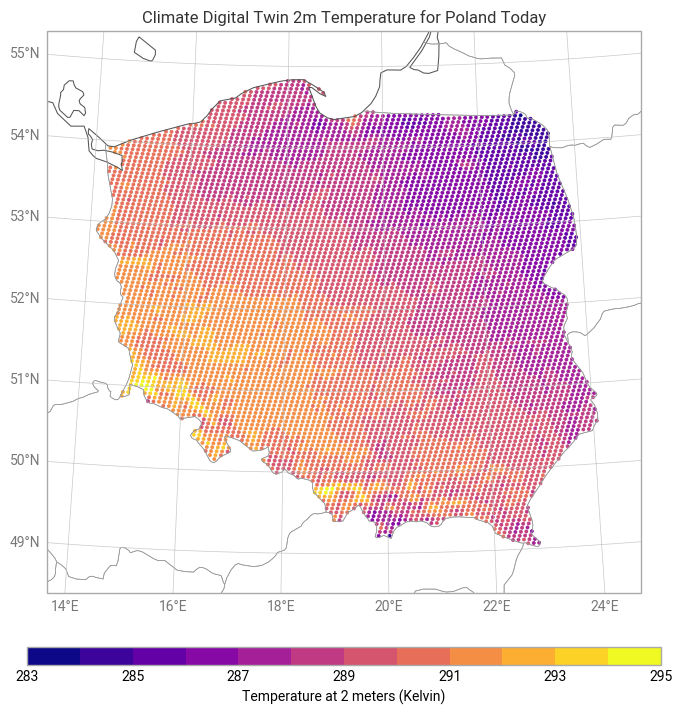

In [43]:
chart = earthkit.plots.Map(domain="Poland")
chart.point_cloud(
    ds['Temperature'],
    x="longitude",
    y="latitude",
    auto_style=True
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 2m Temperature for Poland Today")

chart.legend()

chart.show()

In [44]:
countries = ["Greece"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20250902",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

ds = data.to_xarray()
ds = ds.rename({"2t": "Temperature"})
ds["Temperature"].attrs["units"] = "Kelvin"
ds["Temperature"].attrs["long_name"] = "Temperature at 2 meters"

DEBUG:polytope.api.Client.KYMES9:Gathered Polytope client configuration:
{'address': 'polytope.lumi.apps.dte.destination-earth.eu',
 'insecure': False,
 'key_path': PosixPath('/home/maaw/.polytopeapirc'),
 'log_file': None,
 'log_level': 'DEBUG',
 'password': None,
 'port': None,
 'quiet': False,
 'skip_tls': False,
 'user_email': None,
 'user_key': None,
 'username': 'maaw',
 'verbose': False}
DEBUG:polytope.api.Client.KYMES9:Creating Polytope client...
2025-09-02 20:02:58 - INFO - Key read from /home/maaw/.polytopeapirc
INFO:polytope.api.Client.KYMES9:Key read from /home/maaw/.polytopeapirc


2025-09-02 20:02:58 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20250902'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 36.36875\n'
            '      - 22.9326171875\n'
            '    - - 36.383935546874994\n'
            '      - 22.950488281250017\n'
            '    - - 36.328125\n'
            '      - 22.997851562500017\n'
            '    - - 36.24658203125\n'
            '      - 23.097070312500023\n'
            '    - - 36.189794921875\n'
            '      - 23.053808593750006\n'
            '    - - 36.146386718749994\n'
            '      - 23.04218750000001\n'
            '    - - 36.176220703125\n'
            '      - 22.939453125\n'
            '    - - 36.220996093749996\n'
            '      - 22.91083984375001\n'
            '    - - 36.3203125\n'
            '      -

6cad715c-c92c-44c2-8a0c-fac076a47e21.covjson:   0%|          | 0.00/240k [00:00<?, ?B/s]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): download-polytope.lumi.apps.dte.destination-earth.eu:443
DEBUG:urllib3.connectionpool:https://download-polytope.lumi.apps.dte.destination-earth.eu:443 "GET /default/6cad715c-c92c-44c2-8a0c-fac076a47e21.covjson HTTP/11" 200 245435


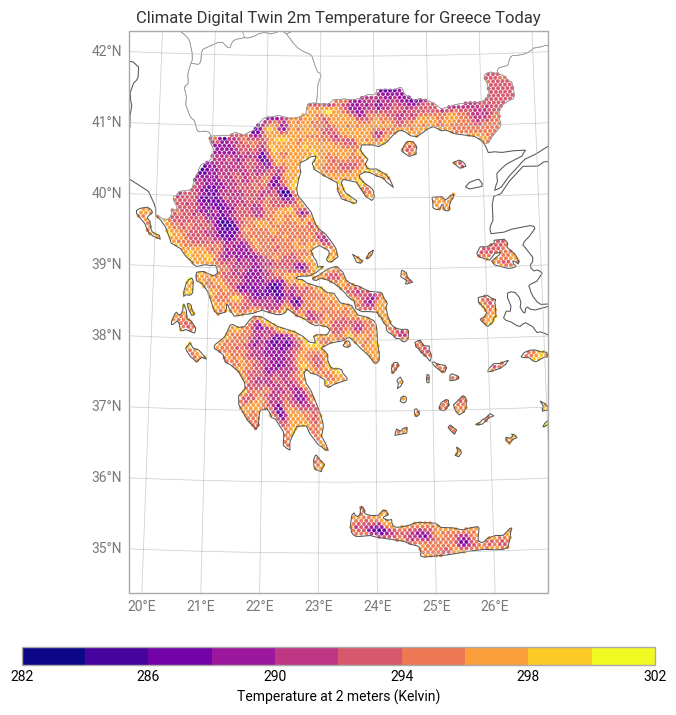

In [45]:
chart = earthkit.plots.Map(domain="Greece")
chart.point_cloud(
    ds['Temperature'],
    x="longitude",
    y="latitude",
    auto_style=True
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 2m Temperature for Greece Today")

chart.legend()

chart.show()

In [69]:
countries = ["France"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20250902",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

ds = data.to_xarray()
ds = ds.rename({"2t": "Temperature"})
ds["Temperature"].attrs["units"] = "Kelvin"
ds["Temperature"].attrs["long_name"] = "Temperature at 2 meters"

DEBUG:polytope.api.Client.X5W269:Gathered Polytope client configuration:
{'address': 'polytope.lumi.apps.dte.destination-earth.eu',
 'insecure': False,
 'key_path': PosixPath('/home/maaw/.polytopeapirc'),
 'log_file': None,
 'log_level': 'DEBUG',
 'password': None,
 'port': None,
 'quiet': False,
 'skip_tls': False,
 'user_email': None,
 'user_key': None,
 'username': 'maaw',
 'verbose': False}
DEBUG:polytope.api.Client.X5W269:Creating Polytope client...
2025-09-02 20:26:57 - INFO - Key read from /home/maaw/.polytopeapirc
INFO:polytope.api.Client.X5W269:Key read from /home/maaw/.polytopeapirc
2025-09-02 20:26:57 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20250902'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 42.658593749999994\n'
            '      - 9.454199218750006\n'
            '   

a562f513-f7a1-44ef-9bdd-701be03fc8bd.covjson:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): download-polytope.lumi.apps.dte.destination-earth.eu:443
DEBUG:urllib3.connectionpool:https://download-polytope.lumi.apps.dte.destination-earth.eu:443 "GET /default/a562f513-f7a1-44ef-9bdd-701be03fc8bd.covjson HTTP/11" 200 1042234


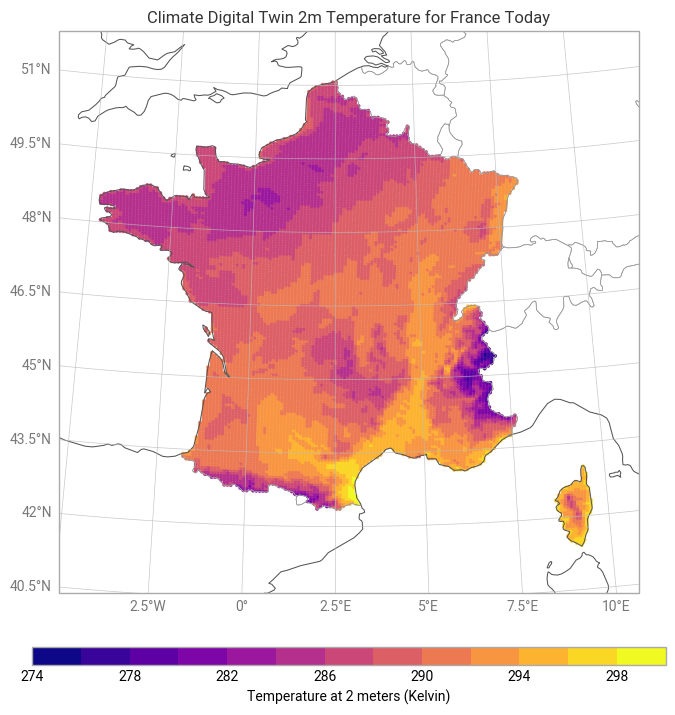

In [70]:
chart = earthkit.plots.Map(domain="France")
chart.point_cloud(
    ds['Temperature'],
    x="longitude",
    y="latitude",
    auto_style=True
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 2m Temperature for France Today")

chart.legend()

chart.show()

In [71]:
countries = ["France"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20260902",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

ds = data.to_xarray()
ds = ds.rename({"2t": "Temperature"})
ds["Temperature"].attrs["units"] = "Kelvin"
ds["Temperature"].attrs["long_name"] = "Temperature at 2 meters"

DEBUG:polytope.api.Client.7SNEXI:Gathered Polytope client configuration:
{'address': 'polytope.lumi.apps.dte.destination-earth.eu',
 'insecure': False,
 'key_path': PosixPath('/home/maaw/.polytopeapirc'),
 'log_file': None,
 'log_level': 'DEBUG',
 'password': None,
 'port': None,
 'quiet': False,
 'skip_tls': False,
 'user_email': None,
 'user_key': None,
 'username': 'maaw',
 'verbose': False}
DEBUG:polytope.api.Client.7SNEXI:Creating Polytope client...
2025-09-02 20:27:23 - INFO - Key read from /home/maaw/.polytopeapirc
INFO:polytope.api.Client.7SNEXI:Key read from /home/maaw/.polytopeapirc


2025-09-02 20:27:23 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20260902'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 42.658593749999994\n'
            '      - 9.454199218750006\n'
            '    - - 42.615576171875\n'
            '      - 9.473242187500006\n'
            '    - - 42.585595703124994\n'
            '      - 9.509375000000006\n'
            '    - - 42.552636718749994\n'
            '      - 9.526171875000017\n'
            '    - - 42.160937499999996\n'
            '      - 9.556445312500017\n'
            '    - - 42.129736328125\n'
            '      - 9.550683593750023\n'
            '    - - 41.972412109375\n'
            '      - 9.428417968750011\n'
            '    - - 41.926220703125\n'
            '      - 9.40087890625\n'
            '    - - 41.731201171875\

230c1d7a-7274-4416-a485-f9d1476a9cf3.covjson:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): download-polytope.lumi.apps.dte.destination-earth.eu:443
DEBUG:urllib3.connectionpool:https://download-polytope.lumi.apps.dte.destination-earth.eu:443 "GET /default/230c1d7a-7274-4416-a485-f9d1476a9cf3.covjson HTTP/11" 200 1043957


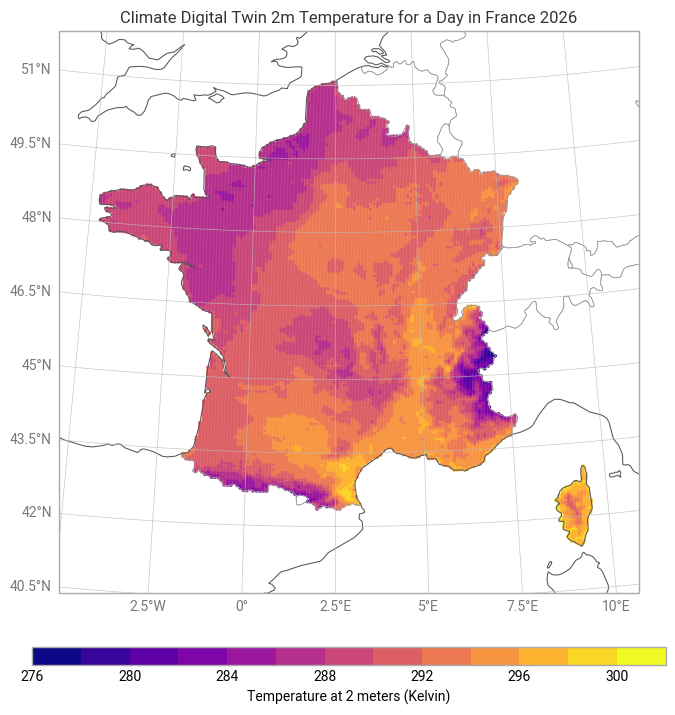

In [72]:
chart = earthkit.plots.Map(domain="France")
chart.point_cloud(
    ds['Temperature'],
    x="longitude",
    y="latitude",
    auto_style=True
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 2m Temperature for a Day in France 2026")

chart.legend()

chart.show()

In [73]:
countries = ["France"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20300902",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

ds = data.to_xarray()
ds = ds.rename({"2t": "Temperature"})
ds["Temperature"].attrs["units"] = "Kelvin"
ds["Temperature"].attrs["long_name"] = "Temperature at 2 meters"

DEBUG:polytope.api.Client.N7PBZN:Gathered Polytope client configuration:
{'address': 'polytope.lumi.apps.dte.destination-earth.eu',
 'insecure': False,
 'key_path': PosixPath('/home/maaw/.polytopeapirc'),
 'log_file': None,
 'log_level': 'DEBUG',
 'password': None,
 'port': None,
 'quiet': False,
 'skip_tls': False,
 'user_email': None,
 'user_key': None,
 'username': 'maaw',
 'verbose': False}
DEBUG:polytope.api.Client.N7PBZN:Creating Polytope client...
2025-09-02 20:27:49 - INFO - Key read from /home/maaw/.polytopeapirc
INFO:polytope.api.Client.N7PBZN:Key read from /home/maaw/.polytopeapirc


2025-09-02 20:27:49 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20300902'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 42.658593749999994\n'
            '      - 9.454199218750006\n'
            '    - - 42.615576171875\n'
            '      - 9.473242187500006\n'
            '    - - 42.585595703124994\n'
            '      - 9.509375000000006\n'
            '    - - 42.552636718749994\n'
            '      - 9.526171875000017\n'
            '    - - 42.160937499999996\n'
            '      - 9.556445312500017\n'
            '    - - 42.129736328125\n'
            '      - 9.550683593750023\n'
            '    - - 41.972412109375\n'
            '      - 9.428417968750011\n'
            '    - - 41.926220703125\n'
            '      - 9.40087890625\n'
            '    - - 41.731201171875\

b9e780fe-2d33-4439-bda8-9ae9c38b9633.covjson:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): download-polytope.lumi.apps.dte.destination-earth.eu:443
DEBUG:urllib3.connectionpool:https://download-polytope.lumi.apps.dte.destination-earth.eu:443 "GET /default/b9e780fe-2d33-4439-bda8-9ae9c38b9633.covjson HTTP/11" 200 1048882


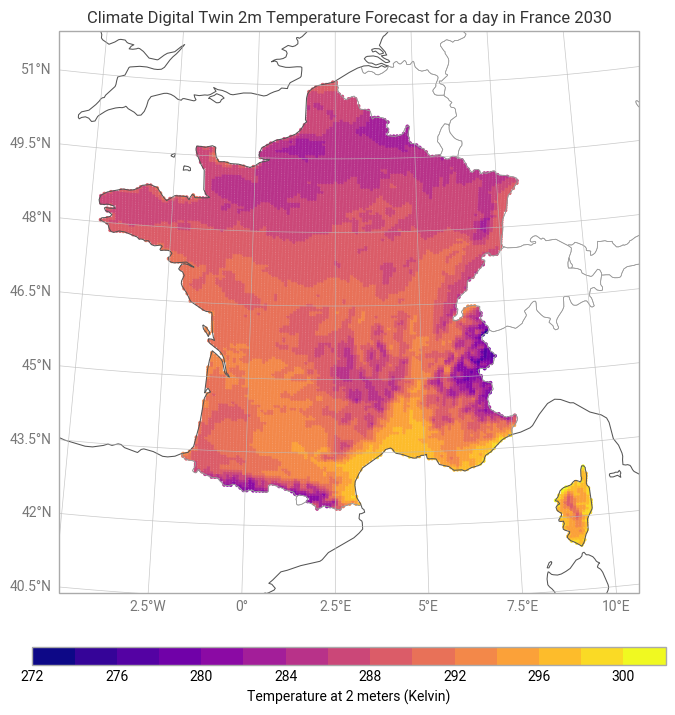

In [74]:
chart = earthkit.plots.Map(domain="France")
chart.point_cloud(
    ds['Temperature'],
    x="longitude",
    y="latitude",
    auto_style=True
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 2m Temperature Forecast for a day in France 2030")

chart.legend()

chart.show()

In [79]:
countries = ["France"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20350902",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

ds = data.to_xarray()
ds = ds.rename({"2t": "Temperature"})
ds["Temperature"].attrs["units"] = "Kelvin"
ds["Temperature"].attrs["long_name"] = "Temperature at 2 meters"

DEBUG:polytope.api.Client.O2IW53:Gathered Polytope client configuration:
{'address': 'polytope.lumi.apps.dte.destination-earth.eu',
 'insecure': False,
 'key_path': PosixPath('/home/maaw/.polytopeapirc'),
 'log_file': None,
 'log_level': 'DEBUG',
 'password': None,
 'port': None,
 'quiet': False,
 'skip_tls': False,
 'user_email': None,
 'user_key': None,
 'username': 'maaw',
 'verbose': False}
DEBUG:polytope.api.Client.O2IW53:Creating Polytope client...
2025-09-02 20:32:06 - INFO - Key read from /home/maaw/.polytopeapirc
INFO:polytope.api.Client.O2IW53:Key read from /home/maaw/.polytopeapirc


2025-09-02 20:32:06 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20350902'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 42.658593749999994\n'
            '      - 9.454199218750006\n'
            '    - - 42.615576171875\n'
            '      - 9.473242187500006\n'
            '    - - 42.585595703124994\n'
            '      - 9.509375000000006\n'
            '    - - 42.552636718749994\n'
            '      - 9.526171875000017\n'
            '    - - 42.160937499999996\n'
            '      - 9.556445312500017\n'
            '    - - 42.129736328125\n'
            '      - 9.550683593750023\n'
            '    - - 41.972412109375\n'
            '      - 9.428417968750011\n'
            '    - - 41.926220703125\n'
            '      - 9.40087890625\n'
            '    - - 41.731201171875\

c75c75ba-7333-4040-8022-49b3b4fd6e14.covjson:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): download-polytope.lumi.apps.dte.destination-earth.eu:443
DEBUG:urllib3.connectionpool:https://download-polytope.lumi.apps.dte.destination-earth.eu:443 "GET /default/c75c75ba-7333-4040-8022-49b3b4fd6e14.covjson HTTP/11" 200 1050841


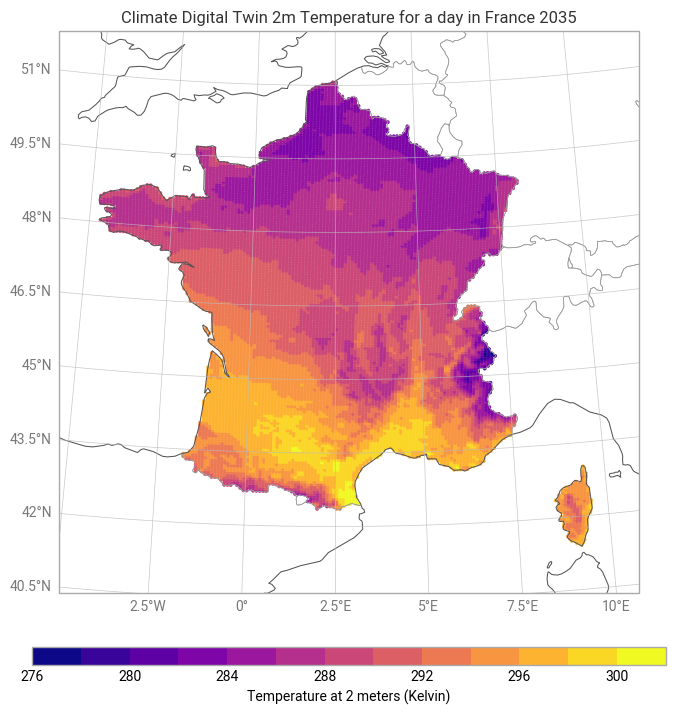

In [80]:
chart = earthkit.plots.Map(domain="France")
chart.point_cloud(
    ds['Temperature'],
    x="longitude",
    y="latitude",
    auto_style=True
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 2m Temperature for a day in France 2035")

chart.legend()

chart.show()

In [81]:
countries = ["France"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20390902",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

ds = data.to_xarray()
ds = ds.rename({"2t": "Temperature"})
ds["Temperature"].attrs["units"] = "Kelvin"
ds["Temperature"].attrs["long_name"] = "Temperature at 2 meters"

DEBUG:polytope.api.Client.5B1C0Q:Gathered Polytope client configuration:
{'address': 'polytope.lumi.apps.dte.destination-earth.eu',
 'insecure': False,
 'key_path': PosixPath('/home/maaw/.polytopeapirc'),
 'log_file': None,
 'log_level': 'DEBUG',
 'password': None,
 'port': None,
 'quiet': False,
 'skip_tls': False,
 'user_email': None,
 'user_key': None,
 'username': 'maaw',
 'verbose': False}
DEBUG:polytope.api.Client.5B1C0Q:Creating Polytope client...
2025-09-02 20:32:53 - INFO - Key read from /home/maaw/.polytopeapirc
INFO:polytope.api.Client.5B1C0Q:Key read from /home/maaw/.polytopeapirc
2025-09-02 20:32:53 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20390902'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 42.658593749999994\n'
            '      - 9.454199218750006\n'
            '   

DEBUG:polytope.api.Client.5B1C0Q:Polytope client attempting HTTP GET https://polytope.lumi.apps.dte.destination-earth.eu:443/api/v1/requests/./f237c91a-cf7a-4db0-be17-75e27e08eb4b
{'headers': {'Authorization': 'EmailKey adam.warde@ecmwf.int:8e3eca7014e962f75daa7248befbaf62'}, 'json': None}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): polytope.lumi.apps.dte.destination-earth.eu:443
DEBUG:urllib3.connectionpool:https://polytope.lumi.apps.dte.destination-earth.eu:443 "GET /api/v1/requests/f237c91a-cf7a-4db0-be17-75e27e08eb4b HTTP/11" 202 57
DEBUG:polytope.api.Client.5B1C0Q:Polytope client received HTTP SUCCESS (202)
DEBUG:polytope.api.Client.5B1C0Q:Polytope client attempting HTTP GET https://polytope.lumi.apps.dte.destination-earth.eu:443/api/v1/requests/./f237c91a-cf7a-4db0-be17-75e27e08eb4b
{'headers': {'Authorization': 'EmailKey adam.warde@ecmwf.int:8e3eca7014e962f75daa7248befbaf62'}, 'json': None}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): polyt

f237c91a-cf7a-4db0-be17-75e27e08eb4b.covjson:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): download-polytope.lumi.apps.dte.destination-earth.eu:443
DEBUG:urllib3.connectionpool:https://download-polytope.lumi.apps.dte.destination-earth.eu:443 "GET /default/f237c91a-cf7a-4db0-be17-75e27e08eb4b.covjson HTTP/11" 200 1046566


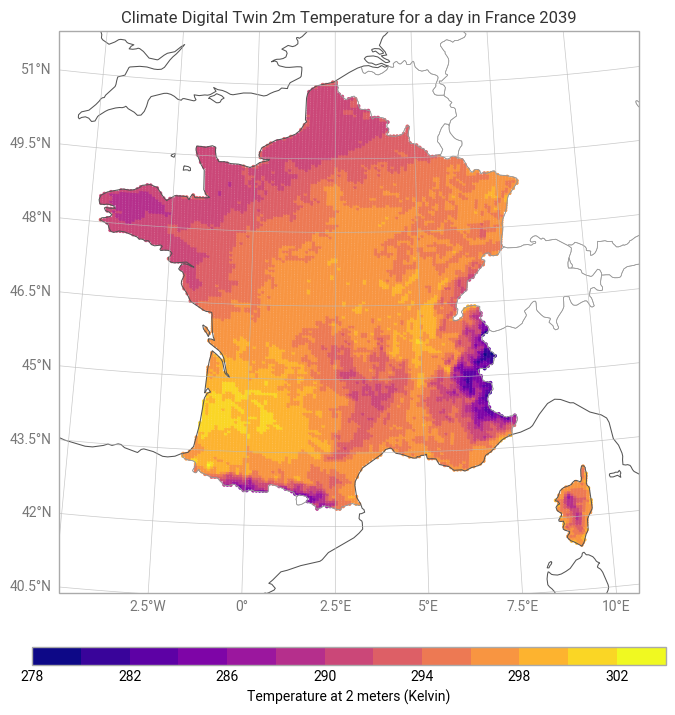

In [82]:
chart = earthkit.plots.Map(domain="France")
chart.point_cloud(
    ds['Temperature'],
    x="longitude",
    y="latitude",
    auto_style=True
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 2m Temperature for a day in France 2039")

chart.legend()

chart.show()

In [60]:
countries = ["Italy"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20250902",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

ds = data.to_xarray()
#ds = ds.rename({"2t": "Temperature"})
#ds["Temperature"].attrs["units"] = "Kelvin"
#ds["Temperature"].attrs["long_name"] = "Temperature at 2 meters"

DEBUG:polytope.api.Client.ZLO4X7:Gathered Polytope client configuration:
{'address': 'polytope.lumi.apps.dte.destination-earth.eu',
 'insecure': False,
 'key_path': PosixPath('/home/maaw/.polytopeapirc'),
 'log_file': None,
 'log_level': 'DEBUG',
 'password': None,
 'port': None,
 'quiet': False,
 'skip_tls': False,
 'user_email': None,
 'user_key': None,
 'username': 'maaw',
 'verbose': False}
DEBUG:polytope.api.Client.ZLO4X7:Creating Polytope client...
2025-09-02 20:20:49 - INFO - Key read from /home/maaw/.polytopeapirc
INFO:polytope.api.Client.ZLO4X7:Key read from /home/maaw/.polytopeapirc
2025-09-02 20:20:49 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20250902'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 36.82861328125\n'
            '      - 11.936425781250023\n'
            '    - 

33e4fcdf-ae72-4081-b3fe-b078cf0e3875.covjson:   0%|          | 0.00/418k [00:00<?, ?B/s]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): download-polytope.lumi.apps.dte.destination-earth.eu:443
DEBUG:urllib3.connectionpool:https://download-polytope.lumi.apps.dte.destination-earth.eu:443 "GET /default/33e4fcdf-ae72-4081-b3fe-b078cf0e3875.covjson HTTP/11" 200 428419


In [61]:
ds

<xarray.Dataset> Size: 297kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 7416)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-09-02 00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 59kB 0 1 2 3 4 5 ... 7410 7411 7412 7413 7414 7415
    latitude   (points) float64 59kB 36.7 36.7 36.75 36.75 ... 47.01 47.01 47.06
    longitude  (points) float64 59kB 14.99 15.07 14.68 ... 12.0 12.09 12.11
    levelist   (points) float64 59kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    10u        (datetimes, number, steps, points) float64 59kB 0.3821 ... -0....
Attributes: (12/15)
    activity:     scenariomip
    class:        d1
    dataset:      climate-dt
    experiment:   ssp3-7.0
    expver:       0001
    generation:   1
    ...           ...
    resolution:   high
    stream:       clte
    type:         fc
    number:       0
    step:         0
    date:         2025-09-02 00:00:00Z

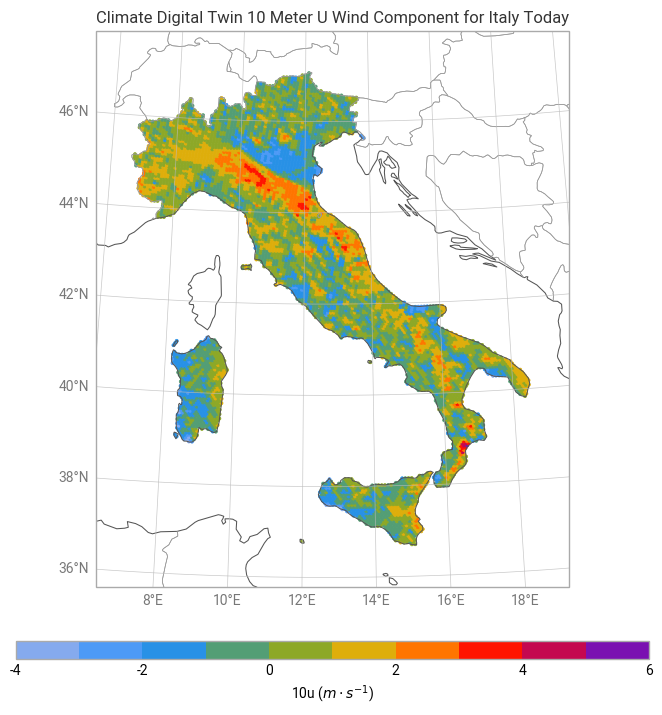

In [62]:
style =earthkit.plots.styles.Style(
    #levels=np.arange(270, 310, 1),
    colors=["#85AAEE", "#208EFC", "#6CA632", "#FFB000", "#FF0000", "#7A11B1"],
)
chart = earthkit.plots.Map(domain="Italy")
chart.point_cloud(
    ds['10u'],
    x="longitude",
    y="latitude",
    style=style
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 10 Meter U Wind Component for Italy Today")

chart.legend()

chart.show()

In [63]:
countries = ["Spain"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20250902",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

ds = data.to_xarray()
#ds = ds.rename({"2t": "Temperature"})
#ds["Temperature"].attrs["units"] = "Kelvin"
#ds["Temperature"].attrs["long_name"] = "Temperature at 2 meters"

DEBUG:polytope.api.Client.WI8PL0:Gathered Polytope client configuration:
{'address': 'polytope.lumi.apps.dte.destination-earth.eu',
 'insecure': False,
 'key_path': PosixPath('/home/maaw/.polytopeapirc'),
 'log_file': None,
 'log_level': 'DEBUG',
 'password': None,
 'port': None,
 'quiet': False,
 'skip_tls': False,
 'user_email': None,
 'user_key': None,
 'username': 'maaw',
 'verbose': False}
DEBUG:polytope.api.Client.WI8PL0:Creating Polytope client...
2025-09-02 20:21:36 - INFO - Key read from /home/maaw/.polytopeapirc
INFO:polytope.api.Client.WI8PL0:Key read from /home/maaw/.polytopeapirc


2025-09-02 20:21:36 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20250902'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 27.727929687499994\n'
            '      - -18.135937499999983\n'
            '    - - 27.761474609375\n'
            '      - -18.160546874999994\n'
            '    - - 27.768115234374996\n'
            '      - -18.043359374999994\n'
            '    - - 27.850146484374996\n'
            '      - -17.924511718749983\n'
            '    - - 27.8095703125\n'
            '      - -17.887939453125\n'
            '    - - 27.646386718749994\n'
            '      - -17.984765624999994\n'
            '    - - 27.707470703124997\n'
            '      - -18.106591796874994\n'
            '    - - 27.727929687499994\n'
            '      - -18.135937499999983\n'
            '  -

42a99715-aca8-4f18-9904-caa484fce3bd.covjson:   0%|          | 0.00/704k [00:00<?, ?B/s]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): download-polytope.lumi.apps.dte.destination-earth.eu:443
DEBUG:urllib3.connectionpool:https://download-polytope.lumi.apps.dte.destination-earth.eu:443 "GET /default/42a99715-aca8-4f18-9904-caa484fce3bd.covjson HTTP/11" 200 721309


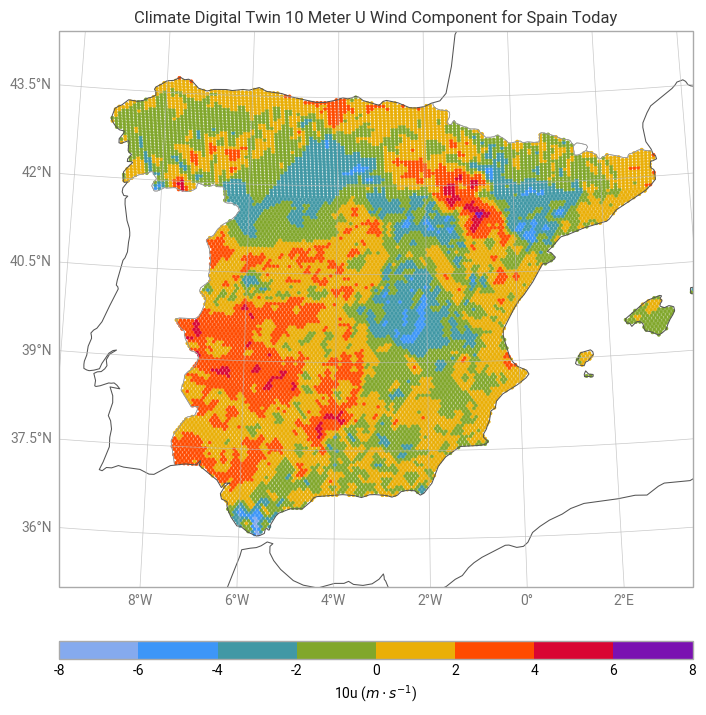

In [64]:
chart = earthkit.plots.Map(domain="Spain")
style =earthkit.plots.styles.Style(
    #levels=np.arange(270, 310, 1),
    colors=["#85AAEE", "#208EFC", "#6CA632", "#FFB000", "#FF0000", "#7A11B1"],
)
chart.point_cloud(
    ds['10u'],
    x="longitude",
    y="latitude",
    style=style
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 10 Meter U Wind Component for Spain Today")

chart.legend()

chart.show()

In [65]:
countries = ["Sweden"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20250902",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

ds = data.to_xarray()
#ds = ds.rename({"2t": "Temperature"})
#ds["Temperature"].attrs["units"] = "Kelvin"
#ds["Temperature"].attrs["long_name"] = "Temperature at 2 meters"

DEBUG:polytope.api.Client.YAJKM2:Gathered Polytope client configuration:
{'address': 'polytope.lumi.apps.dte.destination-earth.eu',
 'insecure': False,
 'key_path': PosixPath('/home/maaw/.polytopeapirc'),
 'log_file': None,
 'log_level': 'DEBUG',
 'password': None,
 'port': None,
 'quiet': False,
 'skip_tls': False,
 'user_email': None,
 'user_key': None,
 'username': 'maaw',
 'verbose': False}
DEBUG:polytope.api.Client.YAJKM2:Creating Polytope client...
2025-09-02 20:22:19 - INFO - Key read from /home/maaw/.polytopeapirc
INFO:polytope.api.Client.YAJKM2:Key read from /home/maaw/.polytopeapirc
2025-09-02 20:22:19 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20250902'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 56.24375\n'
            '      - 16.431640625\n'
            '    - - 56.3108886

DEBUG:urllib3.connectionpool:https://polytope.lumi.apps.dte.destination-earth.eu:443 "POST /api/v1/requests/destination-earth HTTP/11" 202 49
DEBUG:polytope.api.Client.YAJKM2:Polytope client received HTTP SUCCESS (202)
2025-09-02 20:22:20 - INFO - Request accepted. Please poll ./0196f762-a016-4339-afd1-dc448348475c for status
INFO:polytope.api.Client.YAJKM2:Request accepted. Please poll ./0196f762-a016-4339-afd1-dc448348475c for status
DEBUG:polytope.api.Client.YAJKM2:Server message: Request queued
2025-09-02 20:22:20 - INFO - Polytope user key found in session cache for user maaw
INFO:polytope.api.Client.YAJKM2:Polytope user key found in session cache for user maaw
2025-09-02 20:22:20 - INFO - Checking request status (./0196f762-a016-4339-afd1-dc448348475c)...
INFO:polytope.api.Client.YAJKM2:Checking request status (./0196f762-a016-4339-afd1-dc448348475c)...
DEBUG:polytope.api.Client.YAJKM2:Polytope client attempting HTTP GET https://polytope.lumi.apps.dte.destination-earth.eu:443/api

0196f762-a016-4339-afd1-dc448348475c.covjson:   0%|          | 0.00/633k [00:00<?, ?B/s]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): download-polytope.lumi.apps.dte.destination-earth.eu:443
DEBUG:urllib3.connectionpool:https://download-polytope.lumi.apps.dte.destination-earth.eu:443 "GET /default/0196f762-a016-4339-afd1-dc448348475c.covjson HTTP/11" 200 648122


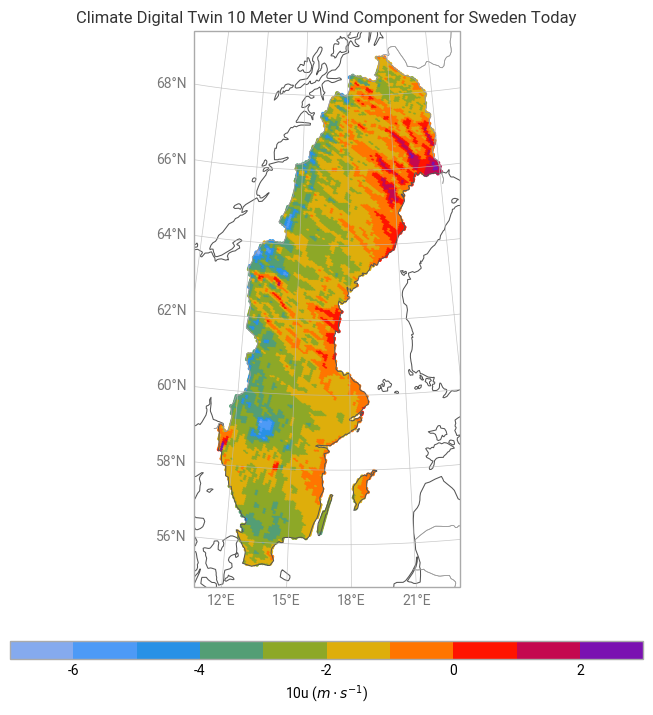

In [66]:
chart = earthkit.plots.Map(domain="Sweden")
style =earthkit.plots.styles.Style(
    #levels=np.arange(270, 310, 1),
    colors=["#85AAEE", "#208EFC", "#6CA632", "#FFB000", "#FF0000", "#7A11B1"],
)
chart.point_cloud(
    ds['10u'],
    x="longitude",
    y="latitude",
    style=style
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 10 Meter U Wind Component for Sweden Today")

chart.legend()

chart.show()

In [67]:
countries = ["Romania"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20250902",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

ds = data.to_xarray()
#ds = ds.rename({"2t": "Temperature"})
#ds["Temperature"].attrs["units"] = "Kelvin"
#ds["Temperature"].attrs["long_name"] = "Temperature at 2 meters"

DEBUG:polytope.api.Client.ER191Y:Gathered Polytope client configuration:
{'address': 'polytope.lumi.apps.dte.destination-earth.eu',
 'insecure': False,
 'key_path': PosixPath('/home/maaw/.polytopeapirc'),
 'log_file': None,
 'log_level': 'DEBUG',
 'password': None,
 'port': None,
 'quiet': False,
 'skip_tls': False,
 'user_email': None,
 'user_key': None,
 'username': 'maaw',
 'verbose': False}
DEBUG:polytope.api.Client.ER191Y:Creating Polytope client...
2025-09-02 20:22:45 - INFO - Key read from /home/maaw/.polytopeapirc
INFO:polytope.api.Client.ER191Y:Key read from /home/maaw/.polytopeapirc
2025-09-02 20:22:45 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20250902'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 45.450439453125\n'
            '      - 28.212500000000006\n'
            '    -

DEBUG:urllib3.connectionpool:https://polytope.lumi.apps.dte.destination-earth.eu:443 "POST /api/v1/requests/destination-earth HTTP/11" 202 49
DEBUG:polytope.api.Client.ER191Y:Polytope client received HTTP SUCCESS (202)
2025-09-02 20:22:45 - INFO - Request accepted. Please poll ./9f4aff5b-4231-47cb-aae4-006f3a24ab87 for status
INFO:polytope.api.Client.ER191Y:Request accepted. Please poll ./9f4aff5b-4231-47cb-aae4-006f3a24ab87 for status
DEBUG:polytope.api.Client.ER191Y:Server message: Request queued
2025-09-02 20:22:45 - INFO - Polytope user key found in session cache for user maaw
INFO:polytope.api.Client.ER191Y:Polytope user key found in session cache for user maaw
2025-09-02 20:22:45 - INFO - Checking request status (./9f4aff5b-4231-47cb-aae4-006f3a24ab87)...
INFO:polytope.api.Client.ER191Y:Checking request status (./9f4aff5b-4231-47cb-aae4-006f3a24ab87)...
DEBUG:polytope.api.Client.ER191Y:Polytope client attempting HTTP GET https://polytope.lumi.apps.dte.destination-earth.eu:443/api

9f4aff5b-4231-47cb-aae4-006f3a24ab87.covjson:   0%|          | 0.00/337k [00:00<?, ?B/s]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): download-polytope.lumi.apps.dte.destination-earth.eu:443
DEBUG:urllib3.connectionpool:https://download-polytope.lumi.apps.dte.destination-earth.eu:443 "GET /default/9f4aff5b-4231-47cb-aae4-006f3a24ab87.covjson HTTP/11" 200 344861


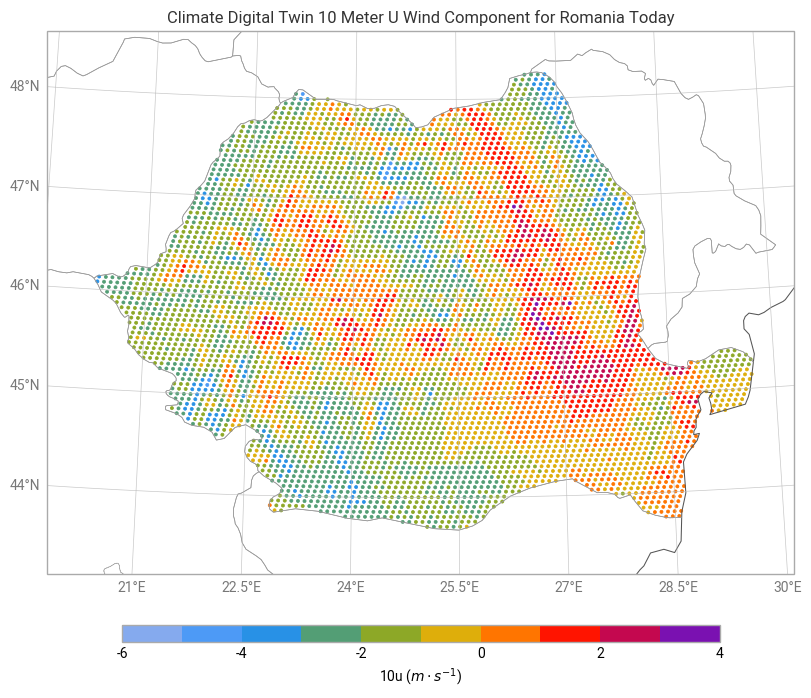

In [68]:
chart = earthkit.plots.Map(domain="Romania")
style =earthkit.plots.styles.Style(
    #levels=np.arange(270, 310, 1),
    colors=["#85AAEE", "#208EFC", "#6CA632", "#FFB000", "#FF0000", "#7A11B1"],
)
chart.point_cloud(
    ds['10u'],
    x="longitude",
    y="latitude",
    style=style
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 10 Meter U Wind Component for Romania Today")

chart.legend()

chart.show()